In [1]:
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras import Model
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm
import pickle

Using TensorFlow backend.


In [2]:
# get archive.zip from https://www.kaggle.com/adityajn105/flickr8k/notebooks
# !unzip -q archive.zip

In [3]:
model = VGG16()

In [4]:
image = load_img('Images/1000268201_693b08cb0e.jpg', target_size=(224, 224))

In [5]:
image

In [6]:
# convert the image pixels to a numpy array
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)

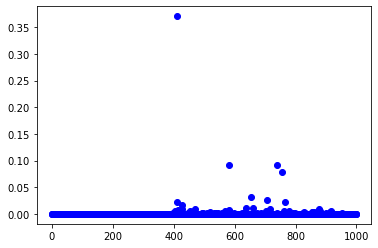

In [7]:
plt.plot(yhat[0], "bo")
plt.show()

In [8]:
labels = decode_predictions(yhat)
for label in labels[0][:6]:
    label = label
    print('%s (%.2f%%)' % (label[1], label[2]*100))

apiary (37.05%)
greenhouse (9.22%)
pot (9.21%)
rain_barrel (7.80%)
milk_can (3.24%)


In [9]:
# Ditch the last layer 
sliced_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
plt.plot(sliced_model.predict(image)[0], "bo", markersize=1)

In [11]:
%timeit sliced_model.predict(image)

388 ms ± 24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
word_feature_file = 'img_features.pkl'
image_folder = "Images"

if not os.path.isfile(word_feature_file):
    image_names = os.listdir(image_folder)
    img_vectors = {}
    for image_name in tqdm(image_names):
        image = img_to_array(load_img(os.path.join(image_folder, image_name), target_size=(224, 224)))
        image_input = preprocess_input(image.reshape((1, image.shape[0], image.shape[1], image.shape[2])))
        vec = sliced_model.predict(image_input)[0]
        img_vectors[image_name] = vec.tolist()

    with open(word_feature_file, 'wb') as handle:
        pickle.dump(img_vectors, handle)
    
    with open("img_features.json", "w") as handle:
        json.dump(img_vectors, handle)
        
else:
    with open(word_feature_file, 'rb') as handle:
        img_vectors = pickle.load(handle)

100%|██████████| 8091/8091 [54:37<00:00,  2.47it/s]  


In [18]:
img_vectors[os.listdir(image_folder)[111]]

array([1.9173548, 0.       , 2.1064095, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

In [21]:
!ls -lsa

total 1690420
      4 drwxr-xr-x 11 jupyter jupyter       4096 Dec 17 10:03 .
      4 drwxr-xr-x  3 root    root          4096 Nov 22 10:27 ..
      4 -rw-------  1 jupyter jupyter         80 Dec  3 15:49 .bash_history
      4 drwxr-xr-x  6 jupyter jupyter       4096 Dec  6 11:33 .cache
      4 drwxr-xr-x  4 jupyter jupyter       4096 Nov 22 10:36 .config
      4 drwxr-xr-x  2 jupyter jupyter       4096 Nov 22 10:30 .docker
      4 drwxr-xr-x  2 jupyter jupyter       4096 Dec 17 09:09 .ipynb_checkpoints
      4 drwxr-xr-x  5 jupyter jupyter       4096 Nov 22 10:36 .ipython
      4 drwxr-xr-x  3 jupyter jupyter       4096 Nov 22 10:34 .jupyter
      4 drwxr-xr-x  3 jupyter jupyter       4096 Nov 22 11:20 .keras
      4 drwxr-xr-x  3 jupyter jupyter       4096 Nov 22 10:30 .local
   1580 -rw-r--r--  1 jupyter jupyter    1615666 Dec  6 12:09 CaptionProcessing.ipynb
    188 -rw-r--r--  1 jupyter jupyter     190383 Dec 17 10:03 ImageFeatureCreation.ipynb
    396 drwxr-xr-x  2 jupyter jupyte